In [3]:
import plotly.graph_objects as go
import networkx as nx



test_name = "seq2t"

stat_path=f"example_stat/{test_name}"
iamge_path=f"{stat_path}/images"



In [4]:
# My util libs
import utils.stat_loader as sload
import utils.stat_print as sp
import utils.vol_stat2graph as vol2g
import utils.vol_graph2sankey as vol2sk

# Improve Functions
## TODO
- (Maybe) Add adjustment of label to full label, file-task label, and no lables
- add VFD stats for file node
- Maps dataset y-axis with blob number as the position, x-axis with first access time

## Maybe
- add option to filter dataset nodes networkx graph (to reduce graph size)

## DONE
- DONE:Add task cutoff option for graphs
- Add task start option for graphs
    - Be careful about adding the required files??!!
- some read_only edges seems wrong direction (maybe `set_task_file_dset_pos`)

In [5]:
STAGE_START = 0
STAGE_END = 10


TASK_ORDER_LIST = sload.load_task_order_list(stat_path)
STAGE_END = sload.correct_end_stage(TASK_ORDER_LIST, STAGE_END)

TASK_ORDER_LIST = sload.current_task_order_list(TASK_ORDER_LIST, STAGE_START, STAGE_END)

TASK_LISTS = list(TASK_ORDER_LIST.keys())

print(f"TASK_ORDER_LIST = {TASK_ORDER_LIST}")
TASK_LISTS

STAGE_END is not in TASK_ORDER_LIST, set to max order: 8
TASK_ORDER_LIST = {'run_idfeature': 0, 'run_tracksingle': 1, 'run_gettracks': 2, 'run_trackstats': 3, 'run_identifymcs': 4, 'run_matchpf': 5, 'run_robustmcs': 6, 'run_mapfeature': 7, 'run_speed': 8}


['run_idfeature',
 'run_tracksingle',
 'run_gettracks',
 'run_trackstats',
 'run_identifymcs',
 'run_matchpf',
 'run_robustmcs',
 'run_mapfeature',
 'run_speed']

In [6]:
task_file_map = sload.load_task_file_map(stat_path, test_name, TASK_LISTS)


for task, stat in task_file_map.items():
    print(f"{task} : {stat}")


vol_files = sload.find_files_with_pattern(stat_path, "vol")
# vol_files = vol_files[0:1]
print(f"vol_files: {vol_files}")


vol_dict = sload.load_stat_json(vol_files)
# sp.print_file_stat(vol_dict)


print("loading yaml done")


task_file_map = {'run_gettracks-229724': {'order': '2', 'io_cnt': 260, 'input': ['/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/track_20150506_010000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_000000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_010000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/track_20150506_020000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_020000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/track_20150506_030000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_030000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/track_20150506_040000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/cl

In [7]:
# Show All VOL Tracker overhead
vol_dict = sload.load_stat_json(vol_files)
sp.show_all_overhead("VOL",vol_dict)

# stops here
# exit(0)

loading example_stat/seq2t/229724-vol_data_stat.json
Total VOL overhead: 11263.0 ms


In [8]:
G_VOL = nx.DiGraph()
G_VOL = vol2g.add_task_dset_file_edges(G_VOL, vol_dict,TASK_LISTS)

# sp.display_all_nodes_attr(G_VOL)
# sp.print_edges(G_VOL)
# sp.draw_graph(G_VOL, test_name, graph_type="vol", prefix=f'{(STAGE_END+1)}s', save=True)

example_stat/seq2t/229724-vol_data_stat.json


task_name: run_gettracks-229724, task_order: 2
node run_gettracks-229724 : {'pos': (2, 2), 'rpos': 0, 'order': 2, 'type': 'task'}, pos: (2, 2)
node : run_gettracks-229724, pos: (6, 0)
task_name: run_trackstats-229724, task_order: 3
node run_trackstats-229724 : {'pos': (2, 54), 'rpos': 0, 'order': 54, 'type': 'task'}, pos: (2, 54)
node : run_trackstats-229724, pos: (9, 0)


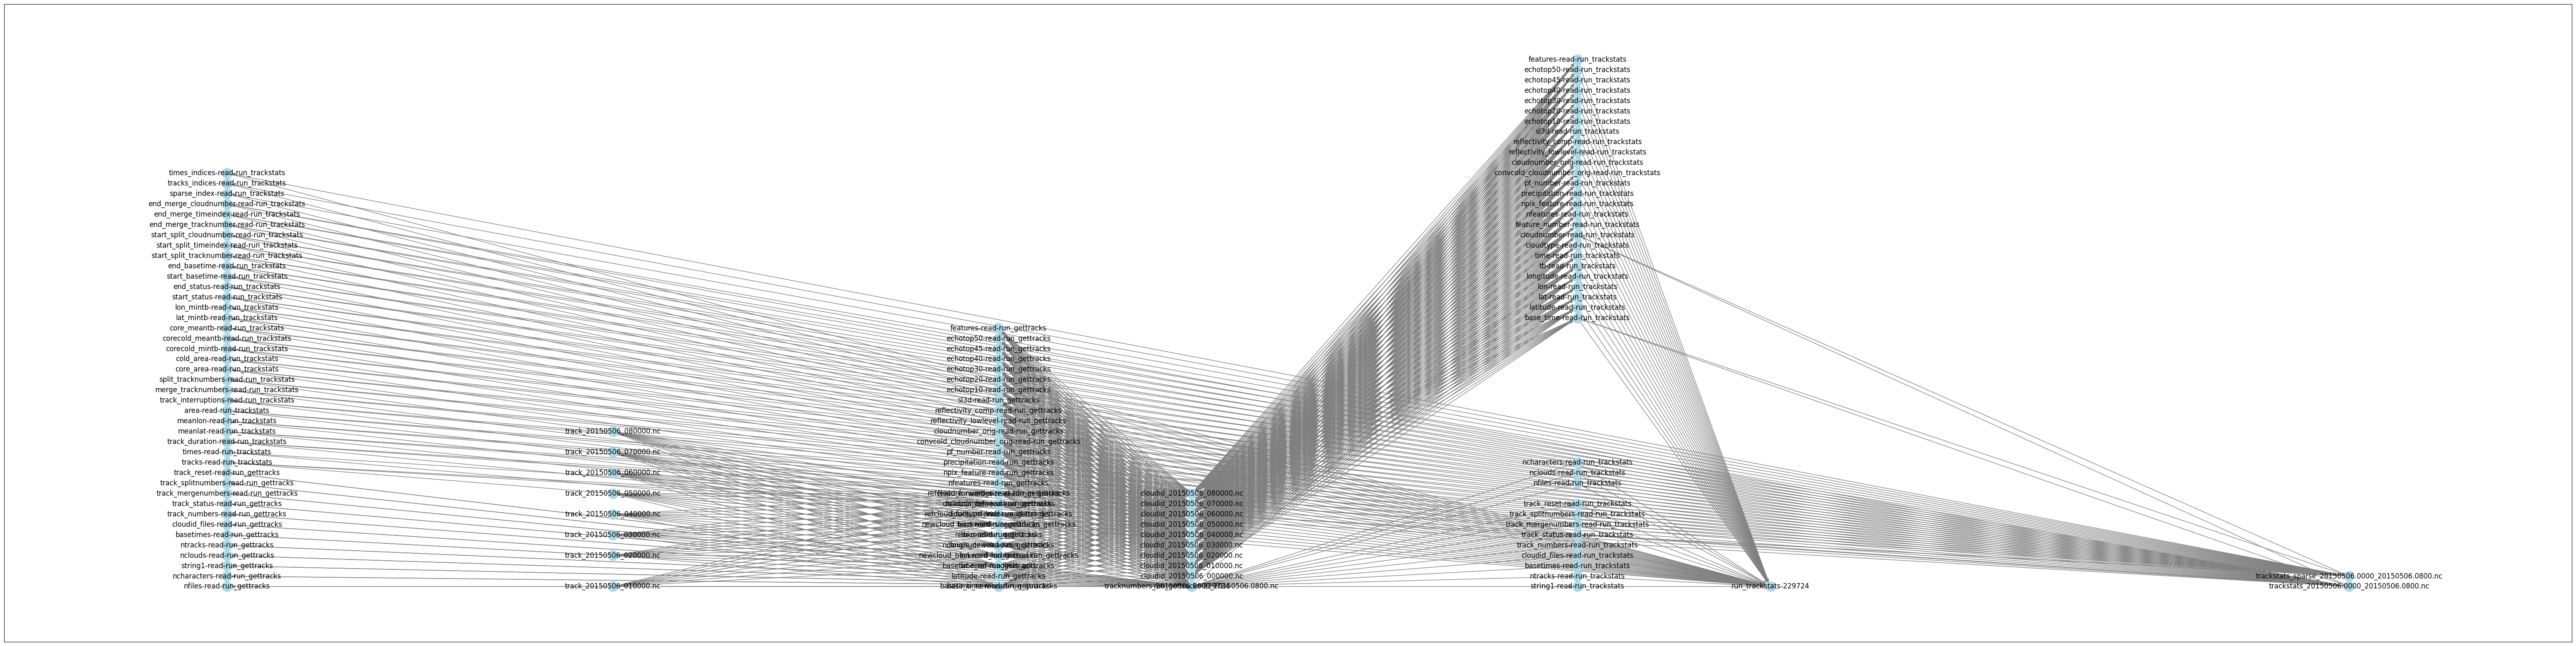

In [9]:
G_VOL = vol2g.set_task_position(G_VOL, task_file_map, STAGE_START)
# print(task_file_map)
G_VOL = vol2g.set_task_file_dset_pos(G_VOL, task_file_map)
sp.draw_graph(G_VOL, test_name, stat_path, graph_type="vol", prefix=f'{(STAGE_END+1)}s', save=True)

# Add networkx to Sankey diagram

## Statistics for Sankey
Below are needed edge attributes before generating the sankey diagram:
- access_cnt : The total file/dataset access count 
- access_size : The total read and write access size
- operation : The operation type : read, write, read_write
- bandwidth : Get the per access size and time, then calculate the bandwidth. Average the bandwidth if multiple accesses. (TODO: currently only recording one access size and time)


In [8]:
vol2sk.prepare_sankey_stat(G_VOL)


In [9]:
vol2sk.time_to_file_x_pos(G_VOL)

track_20150506_010000.nc New pos:  (3.0, 0)
track_20150506_020000.nc New pos:  (3.0428571428571427, 3)
track_20150506_030000.nc New pos:  (3.085714285714286, 5)
track_20150506_040000.nc New pos:  (3.1285714285714286, 7)
track_20150506_050000.nc New pos:  (3.1714285714285713, 9)
track_20150506_060000.nc New pos:  (3.2142857142857144, 11)
track_20150506_070000.nc New pos:  (3.257142857142857, 13)
track_20150506_080000.nc New pos:  (3.3, 15)
trackstats_20150506.0000_20150506.0800.nc New pos:  (12.0, 0)
trackstats_sparse_20150506.0000_20150506.0800.nc New pos:  (12.3, 1)


In [10]:
vol_nodes, vol_nodes_dict = vol2sk.get_nodes_for_sankey(G_VOL, label_on=True)

# print(vol_nodes)

vol_links = vol2sk.get_links_for_sankey(G_VOL, vol_nodes_dict)
fig = go.Figure(go.Sankey(
            node = vol_nodes,
            link = vol_links, orientation='h'))



bandwidth range: 1.07 B/s ~ 1.47 GB/s


In [11]:
width = 3200
height = 1200

fig.update_layout(
    autosize=False,
    width=width,
    height=height,
    margin=dict(
        l=width/100,
        r=width/100,
        b=height/10,
        t=height/2,
        # pad=2
    ),
    font=dict(size=18),
)
fig.show()

saved_image_path = f"{stat_path}/vol-{(STAGE_END+1)}s-{test_name}-sankey.html"

fig.write_html(saved_image_path)
print(f"saved to : {saved_image_path}")

saved to : example_stat/seq2t/vol-9s-seq2t-sankey.html


In [12]:
DATASET_LIMIT = 10

for node, node_attr in vol_nodes.items():
    print(f"{node} : {node_attr}")

print()

vol_nodes_new_dict = {}
dset_count = 0

for node, attr in vol_nodes_dict.items():    
    vol_nodes_new_dict[node] = attr
    # print(f"{node} : {attr}")
    if attr['type'] == 'dataset':
        dset_count+=1
    if dset_count >= DATASET_LIMIT:
        break

print()
        
for node, attr in vol_nodes_new_dict.items():
    print(f"{node} : {attr}")

# get index of selected nodes
wanted_nodes_index = []
for idx, node in enumerate(vol_nodes['label']):
    if node in vol_nodes_new_dict.keys():
        wanted_nodes_index.append(idx)

print(f"wanted_nodes_index: {wanted_nodes_index}")

# select wanted nodes with attributes
vol_new_nodes = {}
for key, val in vol_nodes.items():
    vol_new_nodes[key] = [val[i] for i in wanted_nodes_index]

print(f"New nodes: ")
for node, node_attr in vol_new_nodes.items():
    print(f"{node} : {node_attr}")

# # select wanted links with attributes
# vol_new_links = {}
# for key, val in vol_links.items():
#     vol_new_links[key] = [val[i] for i in wanted_nodes_index]

# print(f"New links: ")
# for link, attr in vol_new_links.items():
#     print(f"{link} : {attr}")



label : ['track_20150506_010000.nc', 'basetime_new-read-run_gettracks', 'run_gettracks-229724', 'time-read-run_gettracks', 'basetime_ref-read-run_gettracks', 'newcloud_backward_index-read-run_gettracks', 'nclouds_new-read-run_gettracks', 'nlinks-read-run_gettracks', 'newcloud_backward_size-read-run_gettracks', 'refcloud_forward_index-read-run_gettracks', 'nclouds_ref-read-run_gettracks', 'refcloud_forward_size-read-run_gettracks', 'cloudid_20150506_000000.nc', 'base_time-read-run_gettracks', 'latitude-read-run_gettracks', 'lat-read-run_gettracks', 'lon-read-run_gettracks', 'longitude-read-run_gettracks', 'tb-read-run_gettracks', 'cloudtype-read-run_gettracks', 'cloudnumber-read-run_gettracks', 'feature_number-read-run_gettracks', 'nfeatures-read-run_gettracks', 'npix_feature-read-run_gettracks', 'precipitation-read-run_gettracks', 'pf_number-read-run_gettracks', 'convcold_cloudnumber_orig-read-run_gettracks', 'cloudnumber_orig-read-run_gettracks', 'reflectivity_lowlevel-read-run_gettra

In [13]:
vol_new_links = vol2sk.get_links_for_sankey(G_VOL, vol_nodes_new_dict, val_sqrt=False)

fig = go.Figure(go.Sankey(
            node = vol_new_nodes,
            link = vol_new_links, orientation='h'))

width = 1000
height = 400

fig.update_layout(
    autosize=False,
    width=1000,
    height=400,
    margin=dict(
        l=width/100,
        r=width/100,
        b=0,
        t=height/5,
    ),
    font=dict(size=18),
)
fig.show()

saved_image_path = f"{stat_path}/vol-{(STAGE_END+1)}s-{test_name}-sankey-{DATASET_LIMIT}dset.html"

fig.write_html(saved_image_path)
print(f"saved to : {saved_image_path}")

bandwidth range: 1.07 B/s ~ 1.47 GB/s


saved to : example_stat/seq2t/vol-9s-seq2t-sankey-10dset.html
